In [365]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import datetime
import datetime as dt

In [366]:
df = pd.read_csv(
    '/Users/maria/Documents/spiced/spiced_projects/spiced_repo/week7/data/ECA_blended_custom/TG_STAID002759.txt', 
    skiprows=19, 
    skipinitialspace=True,
)

In [367]:
df

,SOUID,DATE,TG,Q_TG
0,127488,18760101,22,0
1,127488,18760102,25,0
2,127488,18760103,3,0
3,127488,18760104,-58,0
4,127488,18760105,-98,0
...,...,...,...,...
53352,111448,20220127,44,0
53353,111448,20220128,49,0
53354,111448,20220129,58,0
53355,111448,20220130,58,0


In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53357 entries, 0 to 53356
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   SOUID   53357 non-null  int64
 1   DATE    53357 non-null  int64
 2   TG      53357 non-null  int64
 3   Q_TG    53357 non-null  int64
dtypes: int64(4)
memory usage: 1.6 MB


In [369]:
df.describe()

,SOUID,DATE,TG,Q_TG
count,53357.000000,5.335700e+04,53357.000000,53357.000000
mean,119357.653541,1.948610e+07,57.050415,0.032910
std,8023.826001,4.217116e+05,614.099351,0.543108
min,111448.000000,1.876010e+07,-9999.000000,0.000000
25%,111448.000000,1.912071e+07,33.000000,0.000000
50%,111448.000000,1.949012e+07,94.000000,0.000000
75%,127488.000000,1.985072e+07,157.000000,0.000000
max,128124.000000,2.022013e+07,305.000000,9.000000


In [370]:
df.drop(['SOUID'], axis=1, inplace=True)

In [371]:
df['DATE'] = df['DATE'].astype(str)
df.set_index(pd.to_datetime(df['DATE']), inplace= True)
df.drop(['DATE'], axis=1, inplace=True)

In [372]:
df['T'] = df['TG']*0.1
df.drop(['TG'], axis=1, inplace=True)

In [373]:
df

,Q_TG,T
DATE,,
1876-01-01,0,2.2
1876-01-02,0,2.5
1876-01-03,0,0.3
1876-01-04,0,-5.8
1876-01-05,0,-9.8
...,...,...
2022-01-27,0,4.4
2022-01-28,0,4.9
2022-01-29,0,5.8


# Imputation

In [374]:
# Quality coloumn contains info for missing values
df['Q_TG'].value_counts()

0    53161
9      195
1        1
Name: Q_TG, dtype: int64

In [375]:
missing_values = df[df['Q_TG']==9]
missing_values.index 

DatetimeIndex(['1945-04-25', '1945-04-26', '1945-04-27', '1945-04-28',
               '1945-04-29', '1945-04-30', '1945-05-01', '1945-05-02',
               '1945-05-03', '1945-05-04',
               ...
               '1945-10-27', '1945-10-28', '1945-10-29', '1945-10-30',
               '1945-10-31', '1945-11-01', '1945-11-02', '1945-11-03',
               '1945-11-04', '1945-11-05'],
              dtype='datetime64[ns]', name='DATE', length=195, freq=None)

The 195 missing values are the days between 25.04.1945 and 05.11.1945. 

To impute them, I take the mean temperatures from 2 years before and two years after:

In [376]:
before = df.loc['1943-04-25':'1945-04-24']
after = df.loc['1945-11-06':'1947-11-05']
before = before.groupby([before.index.month, before.index.day]).mean()
after = after.groupby([after.index.month, after.index.day]).mean()

In [377]:
for date in missing_values.index:
    df.loc[date,'T'] = round((before.loc[(date.month,date.day),'T']+ 
                              after.loc[(date.month,date.day),'T'])/2,1)

In [378]:
# Quality coloumn is not needed any more
df.drop(['Q_TG'], axis=1, inplace=True)

# Train - Test Split

In [379]:
df_train = pd.DataFrame.copy(df.loc[:'2015-12-31'])
df_test = pd.DataFrame.copy(df.loc['2016-01-01':])

# Visualization

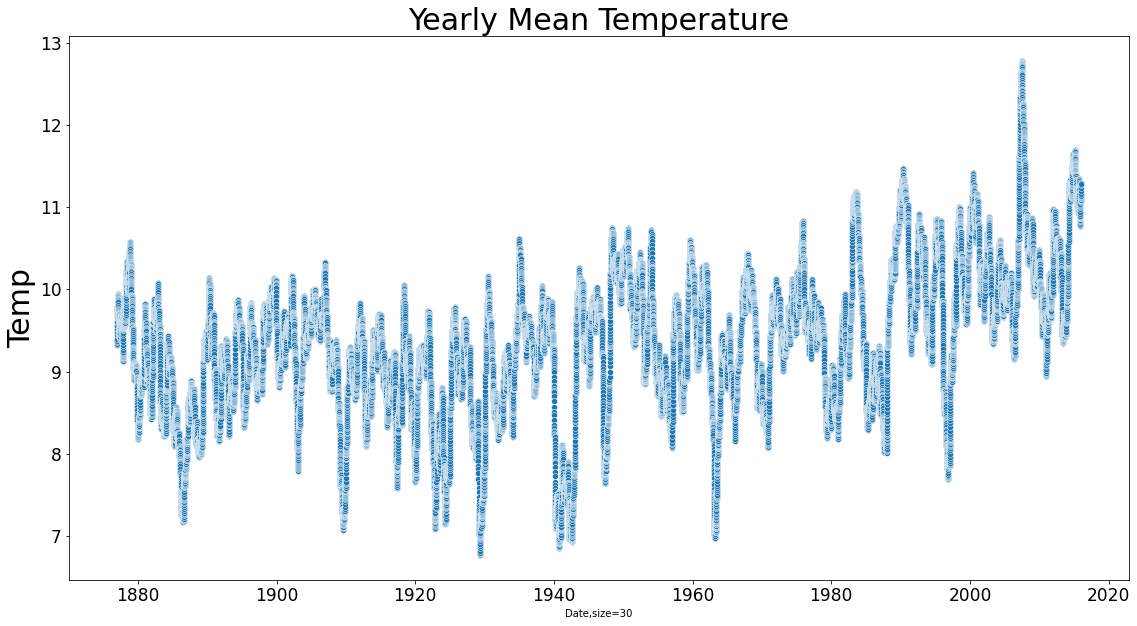

In [380]:
plt.figure(figsize=(19,10))
sns.scatterplot(data =df_train.loc[:'2020-12-31'].rolling(365).mean(), y ='T', x ='DATE')
plt.ylabel('Temp',size=30)
plt.xlabel('Date,size=30')
plt.title('Yearly Mean Temperature',size=30)
plt.xticks(size=17)
plt.yticks(size=17)
plt.show()

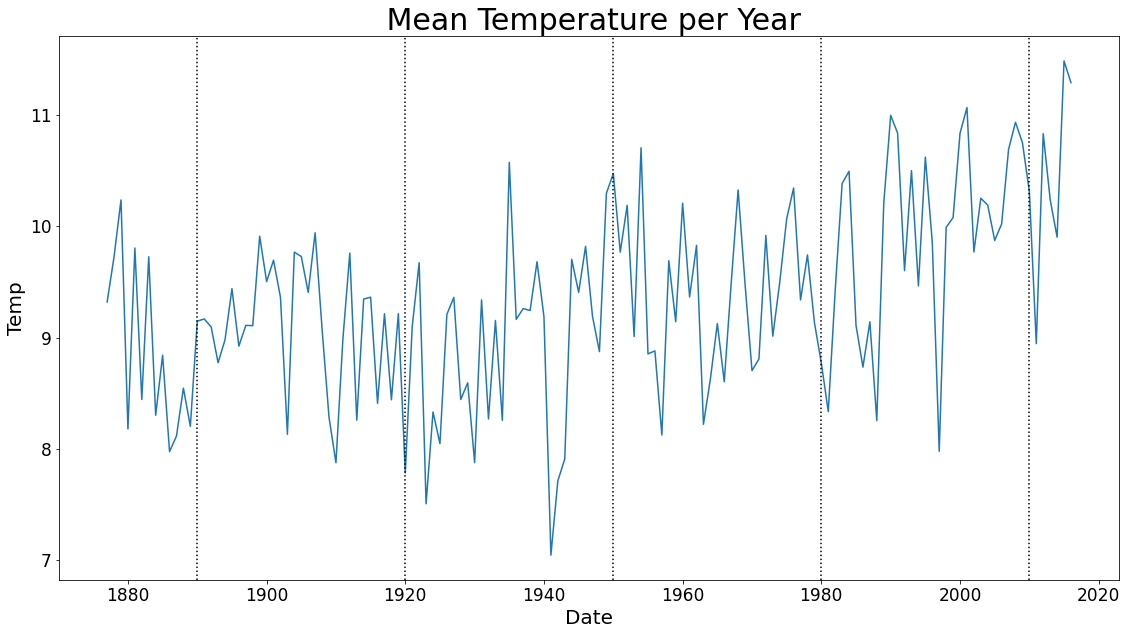

In [381]:
plt.figure(figsize=(19,10))
sns.lineplot(data =df_train.loc[:'2020-12-31'].resample('Y').mean(), y ='T', x ='DATE')
plt.ylabel('Temp',size=20)
plt.xlabel('Date',size=20)
mod = [y for y in df_train.index.year if not y%30]
for year in set(mod):
   plt.axvline(datetime.datetime(year, 1, 1), color='black', ls=':')
plt.title(' Mean Temperature per Year',size=30)
plt.xticks(size=17)
plt.yticks(size=17)
plt.show()

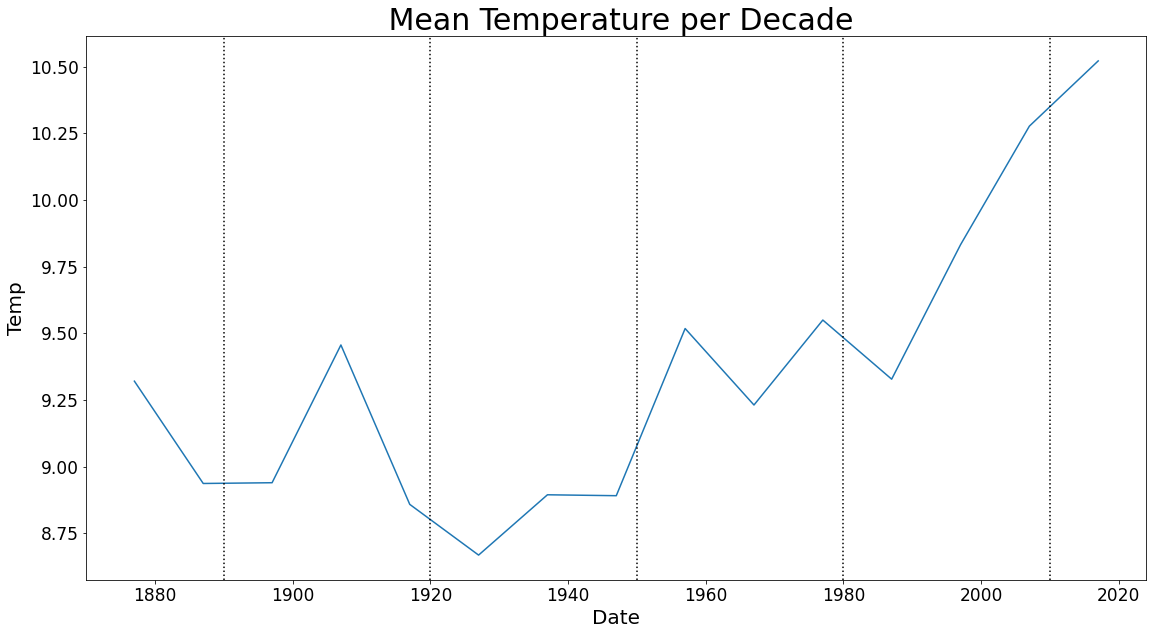

In [382]:
plt.figure(figsize=(19,10))
sns.lineplot(data =df_train.loc[:'2020-12-31'].resample('10Y').mean(), y ='T', x ='DATE')
plt.ylabel('Temp',size=20)
plt.xlabel('Date',size=20)
mod = [y for y in df_train.index.year if not y%30]
for year in set(mod):
   plt.axvline(datetime.datetime(year, 1, 1), color='black', ls=':')
plt.title(' Mean Temperature per Decade',size=30)
plt.xticks(size=17)
plt.yticks(size=17)
plt.show()

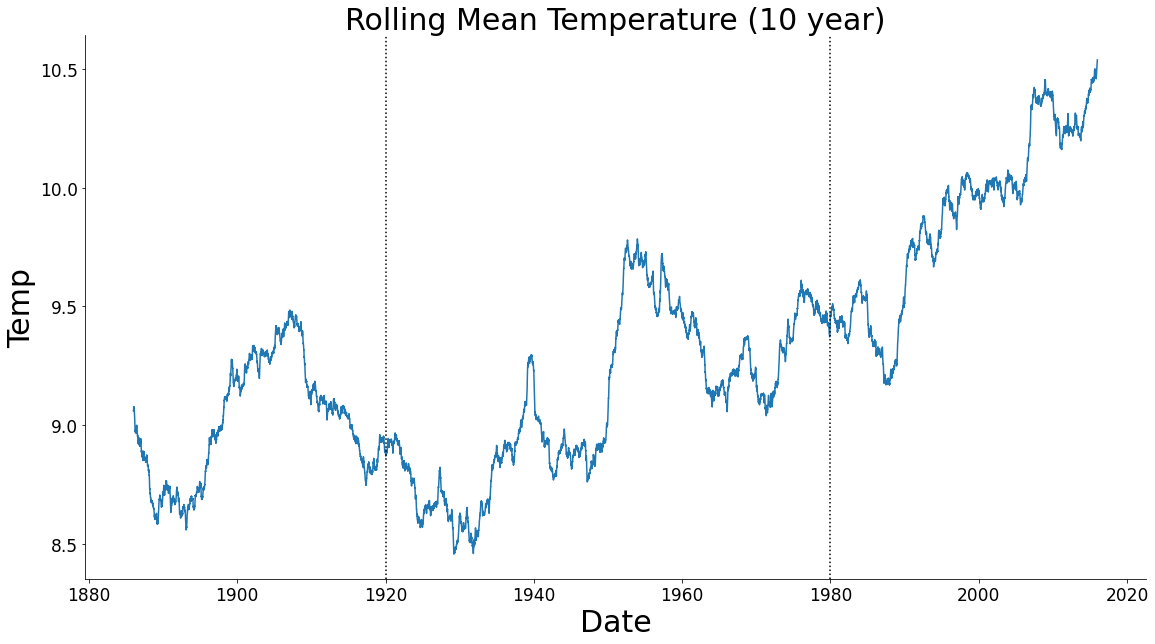

In [383]:
plt.figure(figsize=(19,10))
sns.lineplot(data = df_train.rolling(3652).mean(), y ='T', x ='DATE', markersize=12)
mod = [y for y in df_train.index.year if not y%60]
for year in set(mod):
   plt.axvline(datetime.datetime(year, 1, 1), color='black', ls=':')
plt.ylabel('Temp',size=30)
plt.xlabel('Date',size=30)
plt.title('Rolling Mean Temperature (10 year)',size=30)
plt.xticks(size=17)
plt.yticks(size=17)
sns.despine()

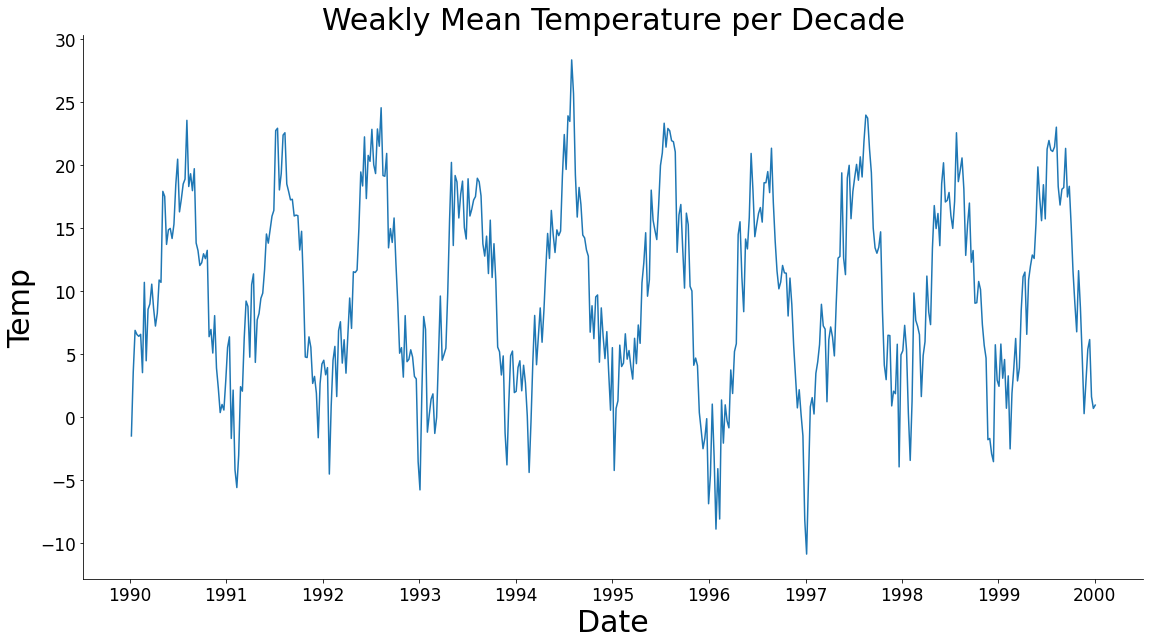

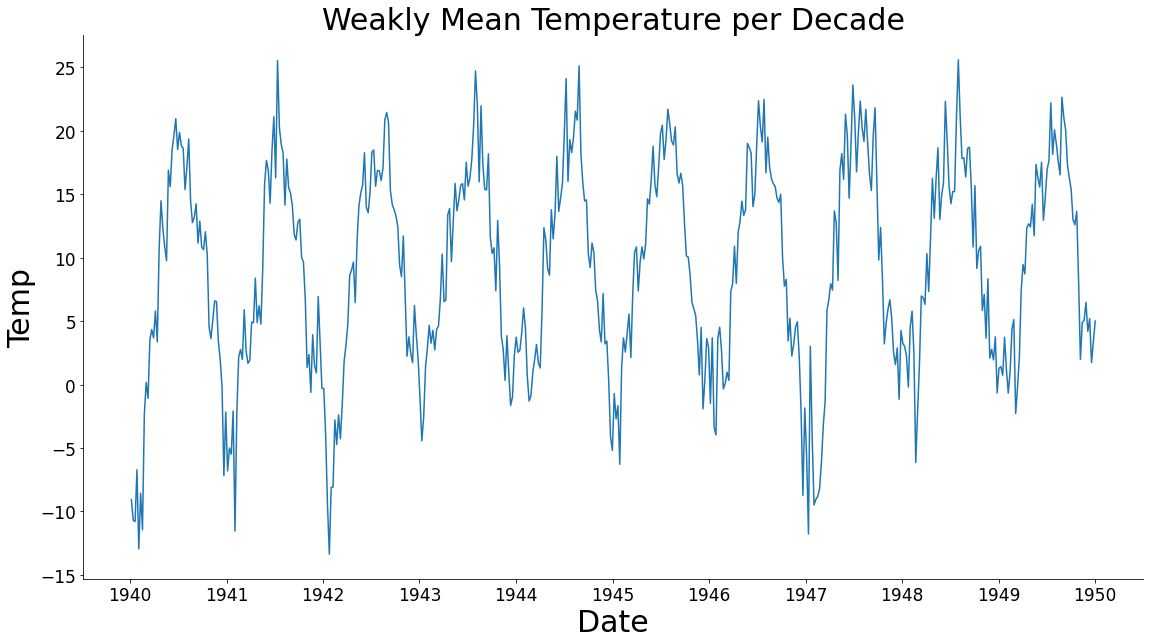

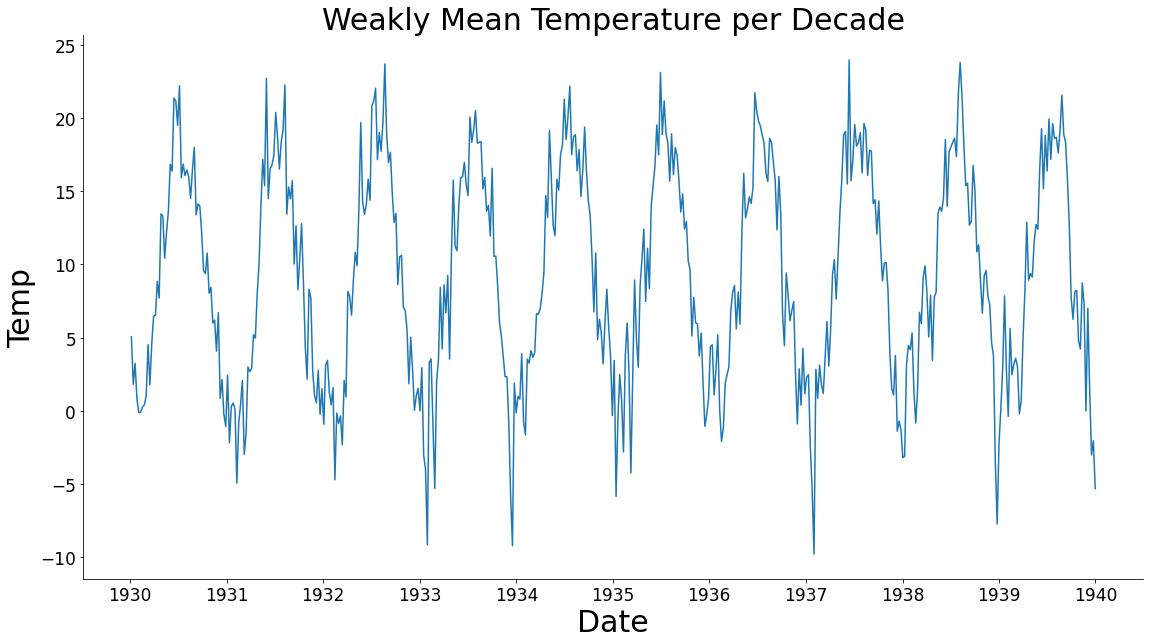

In [384]:
mod = list(set([y for y in df_train.index.year if not y%10]))
for decade in random.sample(mod[:-2],3):
    plt.figure(figsize=(19,10))
    start = f'{decade}-01-01'
    end = f'{decade+9}-12-31'
    sns.lineplot(data = df_train['T'].loc[start:end].resample('W').mean())
    plt.title('Weakly Mean Temperature per Decade',size=30)
    plt.ylabel('Temp',size=30)
    plt.xlabel('Date',size=30)  
    plt.xticks(size=17)
    plt.yticks(size=17)
    sns.despine()

# Cycles of climate? 

### Most important: Yearly Orbit around the Sun

Solar activity: 
  * multiples of 22.75 years
  * intensity increase slowly and then decrease sharply, with a period of about 80-100 years

Ocean-atmosphere interactions: 
 1. El Niño-Southern Oscillation (ENSO): 
  * an interaction between ocean temperatures and atmospheric patterns 
  * 3 to 7 
  * years different weather conditions to different parts of the world (NASA 2009)

2. Pacific Decadal Oscillation (PDO): 
  * occurs in cycles of 25-45 years (Mantua et al. 1997), 

3. Atlantic Multi-decadal Oscillation (AMO):
  * occurring on approximately 65-85 year cycles (Deser et al. 2010). 
  * interaction with the enhanced greenhouse effect (Li et al. 2013).

### Non periodic effects

Orbit around the Sun:
  * changes in eccentricity
  * changes in the tilt of the earth's axis

Random events:
  * Volcanos
  * meteorites
  * comets

Human:
  * Greenhouse gases
  * industrial pollution particles
  * ozone depletion


source:  
 * https://www.fs.usda.gov/ccrc/education/climate-primer/natural-climate-cycles
 * http://dmod.physics.auth.gr/klima_02.htm
 

## Search for higher periodicity than the yearly 

In [385]:
df_train

,T
DATE,
1876-01-01,2.2
1876-01-02,2.5
1876-01-03,0.3
1876-01-04,-5.8
1876-01-05,-9.8
...,...
2015-12-27,10.7
2015-12-28,7.2
2015-12-29,4.5


In [386]:
from scipy.interpolate import interp1d

In [387]:
df_train['timestep'] = list(range(len(df_train)))

In [388]:
f = df_train.resample('Y').mean()
f

,T,timestep
DATE,,
1876-12-31,9.320219,182.5
1877-12-31,9.727945,548.0
1878-12-31,10.236712,913.0
1879-12-31,8.180548,1278.0
1880-12-31,9.805191,1643.5
...,...,...
2011-12-31,10.832055,49490.0
2012-12-31,10.240437,49855.5
2013-12-31,9.902740,50221.0


In [389]:
f1 = interp1d(f['timestep'], f['T'], kind='cubic',fill_value="extrapolate")


In [390]:
f1(df_train['timestep'])

array([11.1217942 , 11.10614477, 11.09056679, ...,  9.05951782,
        9.04155182,  9.02351818])

<AxesSubplot:xlabel='timestep', ylabel='T'>

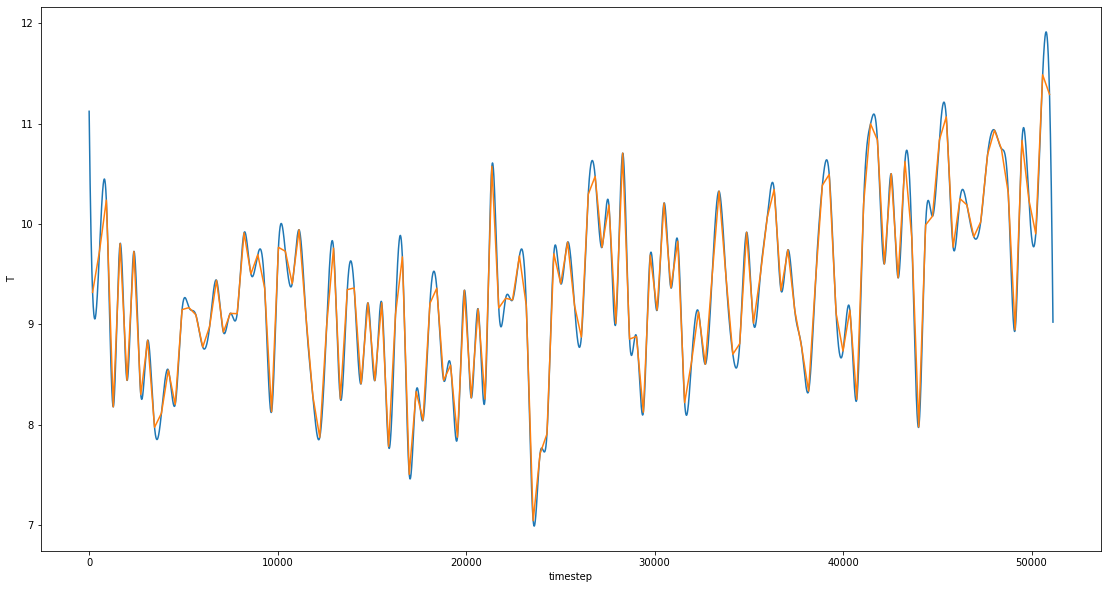

In [391]:
plt.figure(figsize=(19,10))
sns.lineplot(y=f1(df_train['timestep']),x=df_train['timestep'])
sns.lineplot( y =f['T'], x =f['timestep'])


In [392]:
df_train['interpolated'] = f1(df_train['timestep'])

In [393]:
from sklearn.linear_model import LinearRegression

In [394]:
m_trend = LinearRegression()
m_trend.fit(df_train[['timestep']], df_train['interpolated'])

LinearRegression()

In [395]:
m_trend.score(df_train[['timestep']], df_train['interpolated'])

0.23403451422461918

In [396]:
df_train['trend'] = m_trend.predict(df_train[['timestep']])

In [397]:
df_train

,T,timestep,interpolated,trend
DATE,,,,
1876-01-01,2.2,0,11.121794,8.641399
1876-01-02,2.5,1,11.106145,8.641426
1876-01-03,0.3,2,11.090567,8.641454
1876-01-04,-5.8,3,11.075060,8.641481
1876-01-05,-9.8,4,11.059625,8.641508
...,...,...,...,...
2015-12-27,10.7,51129,9.095247,10.040521
2015-12-28,7.2,51130,9.077416,10.040549
2015-12-29,4.5,51131,9.059518,10.040576


<AxesSubplot:xlabel='DATE', ylabel='interpolated'>

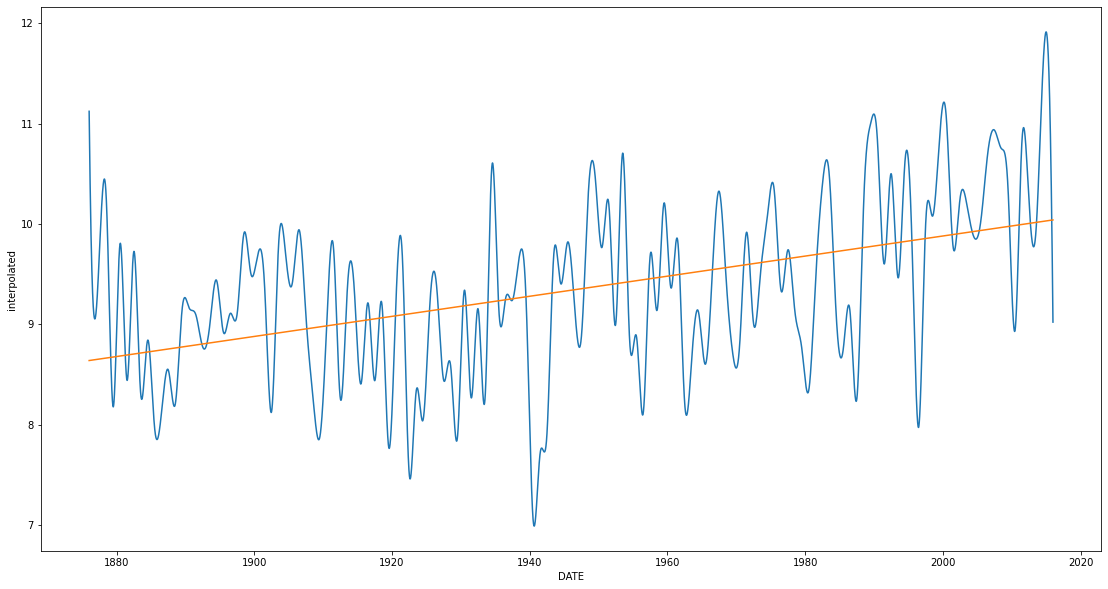

In [398]:
plt.figure(figsize=(19,10))
sns.lineplot(data=df_train, y ='interpolated', x ='DATE')
sns.lineplot(data=df_train, y ='trend', x ='DATE')

In [399]:
signal = df_train['interpolated'] - df_train['trend']
signal

DATE
1876-01-01    2.480395
1876-01-02    2.464719
1876-01-03    2.449113
1876-01-04    2.433579
1876-01-05    2.418116
                ...   
2015-12-27   -0.945274
2015-12-28   -0.963132
2015-12-29   -0.981058
2015-12-30   -0.999052
2015-12-31   -1.017113
Length: 51134, dtype: float64

In [400]:
# Number of sampling points
n = len(signal)
n

51134

<AxesSubplot:xlabel='timestep'>

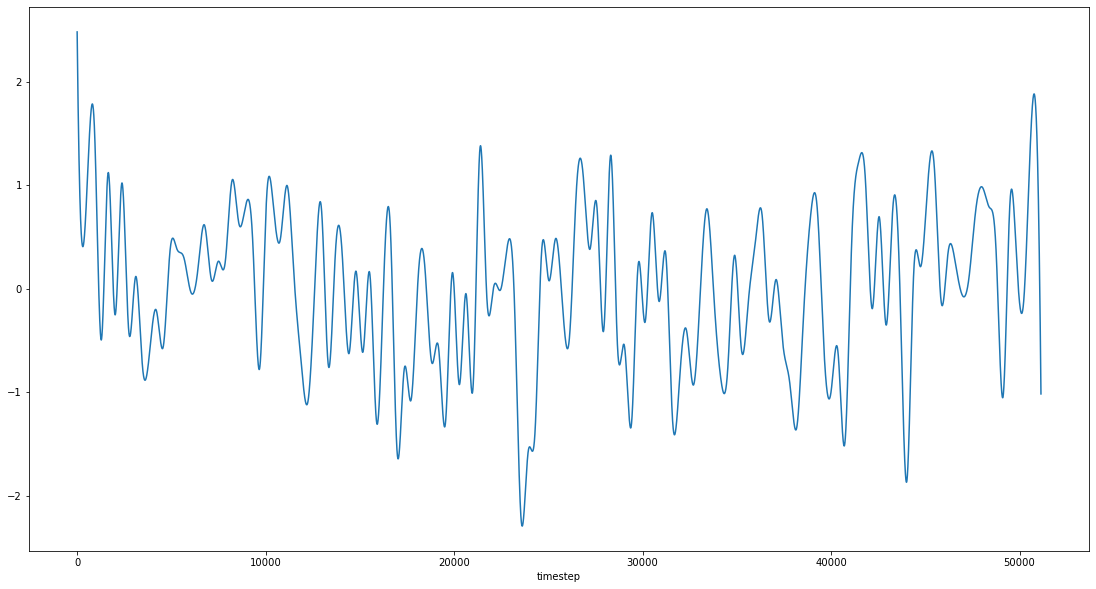

In [401]:
plt.figure(figsize=(19,10))
sns.lineplot(y=signal,x=df_train['timestep'])

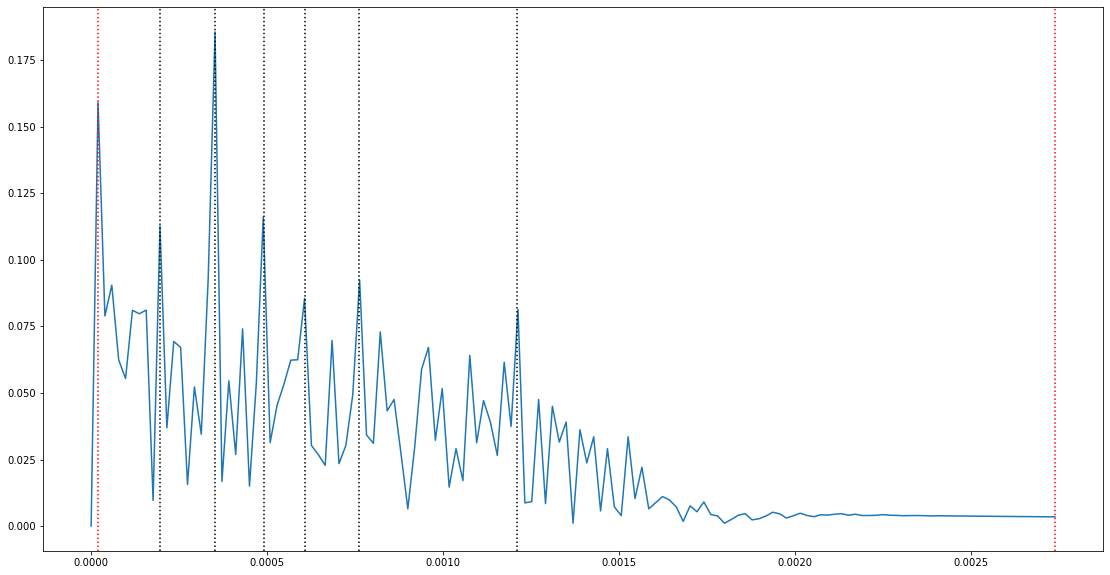

In [424]:

# Sampling space
T = 1.0/365.25 

# fast fourier transform
fourier_signal = np.fft.fft(signal,n)/n
fourier_signal = fourier_signal[range(int(n/2))]

freq = np.arange(int(n/2))/n
plt.figure(figsize=(19,10))

sns.lineplot(x=freq[:141], y=np.abs(fourier_signal)[:141])
plt.axvline(1.955607705094358e-05, color='red', ls=':') # f = 1/1year
plt.axvline(0.0027378507871321013, color='red', ls=':') # f = 1/140year
plt.axvline(0.000197, color='black', ls=':') # peak 0
plt.axvline(0.000351, color='black', ls=':') # peak 1
plt.axvline(0.000607, color='black', ls=':') # peak 2
plt.axvline(0.000762, color='black', ls=':') # peak 3
plt.axvline(0.000491, color='black', ls=':') # peak 4
plt.axvline(0.001211, color='black', ls=':') # peak 6
plt.show
None

In [425]:
frequencies = [0.000197,0.000351,0.000607,0.000762,0.000491,0.001211]

In [426]:
# for a period of 1 year the frequency is 1/(365.25)
# We have taken the yearly mean so we can only consider 
# smaller than this frequencies
1.0/365.25

0.0027378507871321013

In [427]:
# for a period of 140 year the frequency is 1/(140*365.25)
# We cannot consider larger than this frequencies
1.0/(140.0*365.25)
# for this reason we cannot consider the first peak

1.955607705094358e-05

In [428]:
T0 = 1.0/0.000197
T0/365.25

13.897719731635032

In [429]:
T1 = 1.0/0.00035
T1/365.25

7.822430820377432

In [430]:
T2 = 1.0/0.000491
T2/365.25

5.576070849556214

In [431]:
T3 = 1.0/0.000762
T3/365.25

3.592980035606432

In [432]:
for i,frequency in enumerate(frequencies):
    df_train[f'freq_{i}_sinus'] = np.sin(2.0*np.pi*frequency*df_train['timestep'])
    df_train[f'freq_{i}_cos'] = np.cos(2.0*np.pi*frequency*df_train['timestep'])

In [433]:
df_train

,T,timestep,interpolated,trend,freq_0_sinus,freq_0_cos,freq_1_sinus,freq_1_cos,freq_2_sinus,freq_2_cos,freq_3_sinus,freq_3_cos,freq_4_sinus,freq_4_cos,seasonal_trend,freq_5_sinus,freq_5_cos
DATE,,,,,,,,,,,,,,,,,
1876-01-01,2.2,0,11.121794,8.641399,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,8.839486,0.000000,1.000000
1876-01-02,2.5,1,11.106145,8.641426,0.001238,0.999999,0.002205,0.999998,0.003814,0.999993,0.004788,0.999989,0.003085,0.999995,8.838976,0.007609,0.999971
1876-01-03,0.3,2,11.090567,8.641454,0.002476,0.999997,0.004411,0.999990,0.007628,0.999971,0.009575,0.999954,0.006170,0.999981,8.838459,0.015217,0.999884
1876-01-04,-5.8,3,11.075060,8.641481,0.003713,0.999993,0.006616,0.999978,0.011441,0.999935,0.014363,0.999897,0.009255,0.999957,8.837935,0.022825,0.999739
1876-01-05,-9.8,4,11.059625,8.641508,0.004951,0.999988,0.008821,0.999961,0.015255,0.999884,0.019150,0.999817,0.012340,0.999924,8.837405,0.030431,0.999537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-27,10.7,51129,9.095247,10.040521,0.439448,0.898268,-0.331166,0.943573,0.220001,0.975500,-0.246876,0.969047,0.609620,0.792694,10.604407,-0.496992,0.867755
2015-12-28,7.2,51130,9.077416,10.040549,0.440560,0.897723,-0.329084,0.944301,0.223720,0.974654,-0.242233,0.970218,0.612063,0.790809,10.604132,-0.490375,0.871512
2015-12-29,4.5,51131,9.059518,10.040576,0.441671,0.897177,-0.327001,0.945024,0.227435,0.973793,-0.237586,0.971367,0.614499,0.788917,10.603847,-0.483729,0.875218


<AxesSubplot:xlabel='DATE', ylabel='freq_0_sinus'>

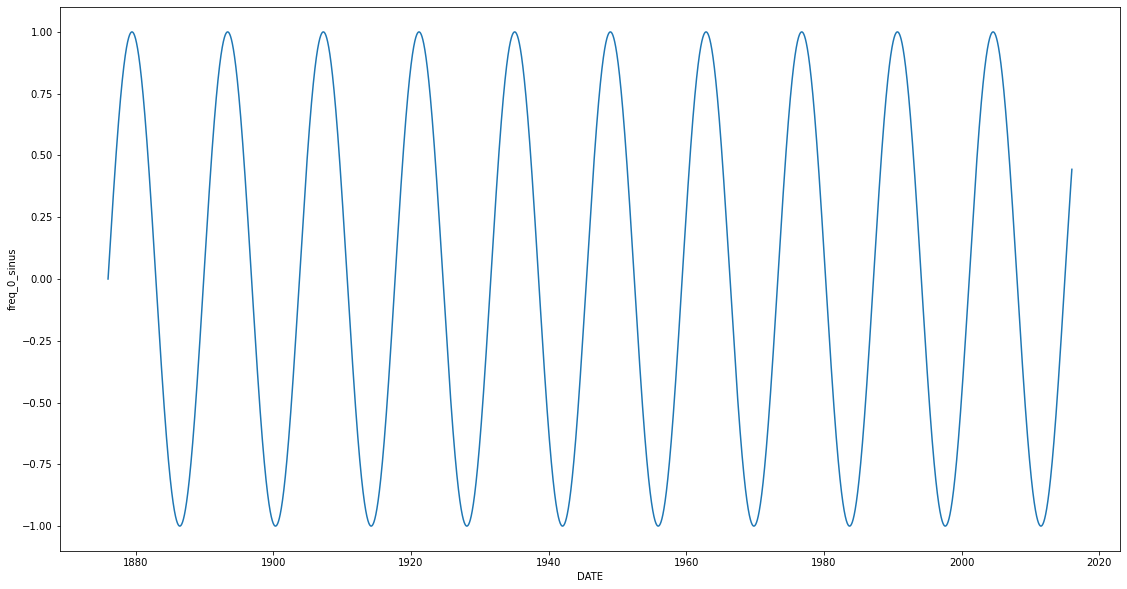

In [434]:
plt.figure(figsize=(19,10))
sns.lineplot(data=df_train, y ='freq_0_sinus', x ='DATE')
#sns.lineplot(data=df_train, y ='trend', x ='DATE')

In [435]:
m_seasonal_trend = LinearRegression()
m_seasonal_trend.fit(df_train.drop(columns=['T','interpolated', 'trend']), df_train['interpolated'])

LinearRegression()

In [436]:
df_train.drop(columns=['T','interpolated', 'trend'])

,timestep,freq_0_sinus,freq_0_cos,freq_1_sinus,freq_1_cos,freq_2_sinus,freq_2_cos,freq_3_sinus,freq_3_cos,freq_4_sinus,freq_4_cos,seasonal_trend,freq_5_sinus,freq_5_cos
DATE,,,,,,,,,,,,,,
1876-01-01,0,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,8.839486,0.000000,1.000000
1876-01-02,1,0.001238,0.999999,0.002205,0.999998,0.003814,0.999993,0.004788,0.999989,0.003085,0.999995,8.838976,0.007609,0.999971
1876-01-03,2,0.002476,0.999997,0.004411,0.999990,0.007628,0.999971,0.009575,0.999954,0.006170,0.999981,8.838459,0.015217,0.999884
1876-01-04,3,0.003713,0.999993,0.006616,0.999978,0.011441,0.999935,0.014363,0.999897,0.009255,0.999957,8.837935,0.022825,0.999739
1876-01-05,4,0.004951,0.999988,0.008821,0.999961,0.015255,0.999884,0.019150,0.999817,0.012340,0.999924,8.837405,0.030431,0.999537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-27,51129,0.439448,0.898268,-0.331166,0.943573,0.220001,0.975500,-0.246876,0.969047,0.609620,0.792694,10.604407,-0.496992,0.867755
2015-12-28,51130,0.440560,0.897723,-0.329084,0.944301,0.223720,0.974654,-0.242233,0.970218,0.612063,0.790809,10.604132,-0.490375,0.871512
2015-12-29,51131,0.441671,0.897177,-0.327001,0.945024,0.227435,0.973793,-0.237586,0.971367,0.614499,0.788917,10.603847,-0.483729,0.875218


In [437]:
m_seasonal_trend.score(df_train.drop(columns=['T','interpolated', 'trend']), df_train['interpolated'])

0.47668410953112195

In [438]:
df_train['seasonal_trend'] = m_seasonal_trend.predict(df_train.drop(columns=['T','interpolated', 'trend']))

<AxesSubplot:xlabel='DATE', ylabel='interpolated'>

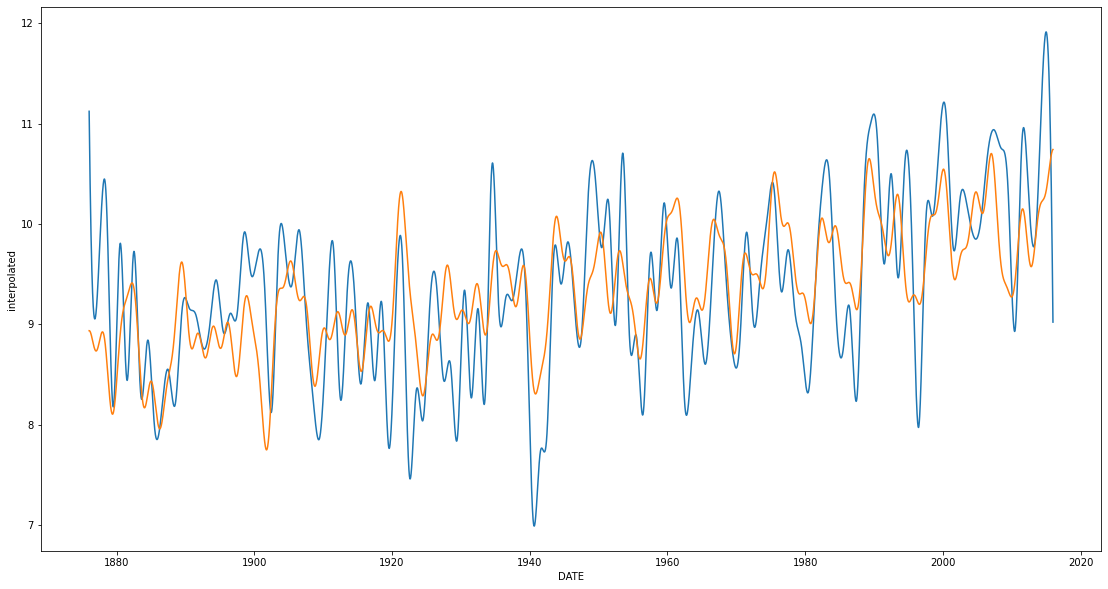

In [439]:
plt.figure(figsize=(19,10))
sns.lineplot(data=df_train, y ='interpolated', x ='DATE')
sns.lineplot(data=df_train, y ='seasonal_trend', x ='DATE')

In [440]:
df_train

,T,timestep,interpolated,trend,freq_0_sinus,freq_0_cos,freq_1_sinus,freq_1_cos,freq_2_sinus,freq_2_cos,freq_3_sinus,freq_3_cos,freq_4_sinus,freq_4_cos,seasonal_trend,freq_5_sinus,freq_5_cos
DATE,,,,,,,,,,,,,,,,,
1876-01-01,2.2,0,11.121794,8.641399,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,8.938356,0.000000,1.000000
1876-01-02,2.5,1,11.106145,8.641426,0.001238,0.999999,0.002205,0.999998,0.003814,0.999993,0.004788,0.999989,0.003085,0.999995,8.938395,0.007609,0.999971
1876-01-03,0.3,2,11.090567,8.641454,0.002476,0.999997,0.004411,0.999990,0.007628,0.999971,0.009575,0.999954,0.006170,0.999981,8.938426,0.015217,0.999884
1876-01-04,-5.8,3,11.075060,8.641481,0.003713,0.999993,0.006616,0.999978,0.011441,0.999935,0.014363,0.999897,0.009255,0.999957,8.938449,0.022825,0.999739
1876-01-05,-9.8,4,11.059625,8.641508,0.004951,0.999988,0.008821,0.999961,0.015255,0.999884,0.019150,0.999817,0.012340,0.999924,8.938464,0.030431,0.999537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-27,10.7,51129,9.095247,10.040521,0.439448,0.898268,-0.331166,0.943573,0.220001,0.975500,-0.246876,0.969047,0.609620,0.792694,10.741065,-0.496992,0.867755
2015-12-28,7.2,51130,9.077416,10.040549,0.440560,0.897723,-0.329084,0.944301,0.223720,0.974654,-0.242233,0.970218,0.612063,0.790809,10.741241,-0.490375,0.871512
2015-12-29,4.5,51131,9.059518,10.040576,0.441671,0.897177,-0.327001,0.945024,0.227435,0.973793,-0.237586,0.971367,0.614499,0.788917,10.741406,-0.483729,0.875218
